In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:

(X_train, y_train), (X_valid, y_valid) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Reshape the input data to a 4D tensor 
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))


# Normalize the input data to have values between 0 and 1
X_train = X_train / 255.0
X_valid = X_valid / 255.0


In [4]:

# myCallback


# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') >= 0.995:                 
                print("\nReached 99.5% accuracy so cancelling training!")
                
                # Stop training once the above condition is met
                self.model.stop_training = True
    pass
        
            
            



In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Flow the training and validation images in batches of 128
train_flow = datagen.flow(X_train, y_train, batch_size=128)
valid_flow = datagen.flow(X_valid, y_valid, batch_size=128)

In [6]:


# convolutional_model
def model():

    # Define the model
    model = tf.keras.models.Sequential([
        
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
      
      
      
      
    ])
 

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
        
    return model

In [7]:
# Instantiate the callback class
callbacks = myCallback()

# Train the model
model = model()
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), callbacks=[callbacks])



Epoch 1/10
1875/1875 [==============================] - 88s 46ms/step - loss: 0.4528 - accuracy: 0.8368 - val_loss: 0.3533 - val_accuracy: 0.8721
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3035 - accuracy: 0.8892 - val_loss: 0.3192 - val_accuracy: 0.8807
Epoch 3/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2543 - accuracy: 0.9051 - val_loss: 0.2887 - val_accuracy: 0.8962
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2231 - accuracy: 0.9171 - val_loss: 0.2785 - val_accuracy: 0.8978
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1970 - accuracy: 0.9276 - val_loss: 0.2585 - val_accuracy: 0.9053
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1758 - accuracy: 0.9337 - val_loss: 0.2474 - val_accuracy: 0.9096
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1545 - accuracy: 0.9417 - val_loss: 0.2575 -

When complete, the results is: Epoch 10/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1030 - accuracy: 0.9619 - val_loss: 0.3010 - val_accuracy: 0.9143

In [8]:
model.save('myModelName.h5')

Saving pants.webp to pants (1).webp
Saving shirt.jpg to shirt (1).jpg
Saving dress.webp to dress.webp
1/1 [==============================] - 0s 119ms/step


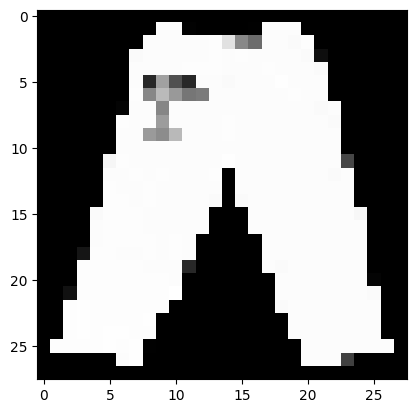

(1, 28, 28, 1)
The uploaded image is a Trouser
1/1 [==============================] - 0s 35ms/step


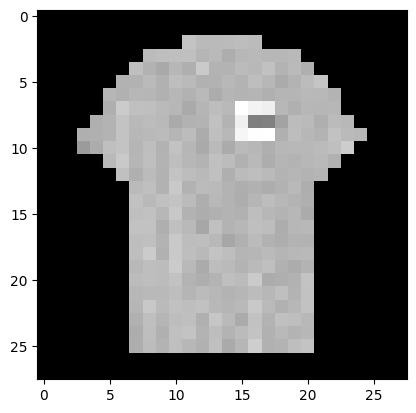

(1, 28, 28, 1)
The uploaded image is a T-shirt/top
1/1 [==============================] - 0s 35ms/step


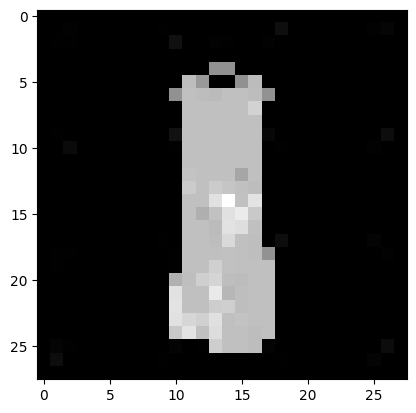

(1, 28, 28, 1)
The uploaded image is a Dress


In [10]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib
import matplotlib.pyplot as pyplot

# Load the trained model
model = load_model('myModelName.h5')

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Prompt user to upload an image
uploaded = files.upload()

for fn in uploaded.keys():
 
  # Load and preprocess the image
  path = '/content/' + fn
  img = load_img(path, target_size=(28, 28), color_mode='grayscale')
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)
  x = x.astype('float32') / 255
  x = 1 - x

  # Make prediction
  prediction = model.predict(x)
  predicted_class = class_labels[np.argmax(prediction)]

  # Plot the image 
  pyplot.imshow(x[0], cmap='gray')
  pyplot.show()
  print(x.shape)

  # Print the predicted class
  print(f'The uploaded image is a {predicted_class}')